In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('1.04. Real-life example.csv')

In [3]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data = df.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# if we remove <5% of the observations, we are free to remove all the missing values


In [8]:
data_no_mv = data.dropna(axis = 0)

In [9]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [10]:
# Drawing pdfs

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

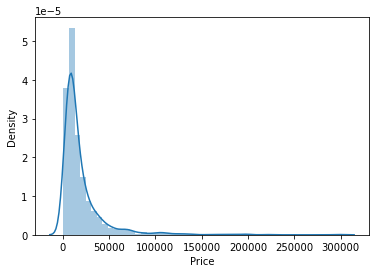

In [11]:
sns.distplot(data_no_mv['Price'])

In [12]:
# to deal with outliers, remove top 1% of observations
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

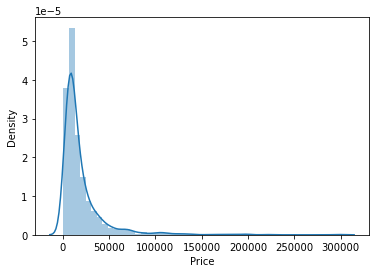

In [13]:
sns.distplot(data_no_mv['Price'])

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

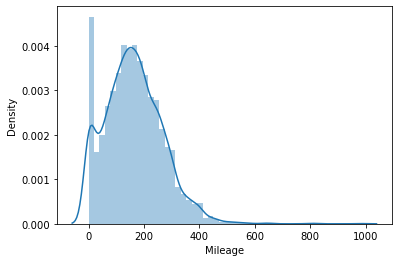

In [14]:
sns.distplot(data_no_mv['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

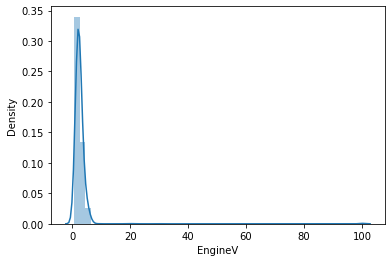

In [16]:
sns.distplot(data_no_mv['EngineV'])

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

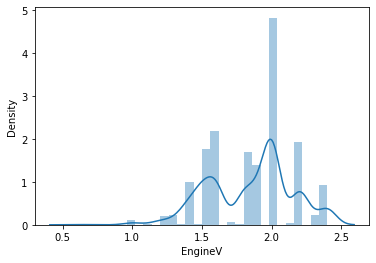

In [17]:
q = data_2['EngineV'].quantile(0.65)
data_3 = data_2[data_2['EngineV']<q]
sns.distplot(data_3['EngineV'])

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

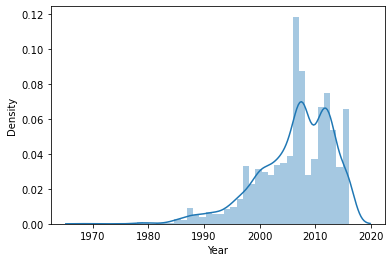

In [18]:
sns.distplot(data_no_mv['Year'])

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

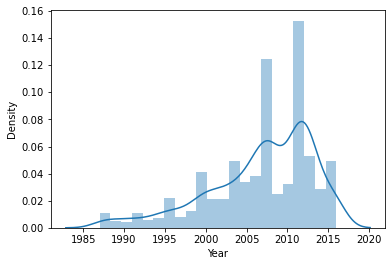

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011
...,...,...,...,...,...,...,...,...
4335,BMW,27900.0,sedan,38,2.0,Petrol,yes,2013
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014


In [21]:
data_cleaned = data_4.reset_index(drop=True) 
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,2321,2321.000000,2321,2321.000000,2321.000000,2321,2321,2321.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,692,NaN,871,NaN,NaN,1079,2131,NaN
mean,NaN,12978.758031,NaN,158.513141,1.849711,NaN,NaN,2006.828091
std,NaN,11898.830659,NaN,93.561242,0.301095,NaN,NaN,6.494175
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000
25%,NaN,6500.000000,NaN,94.000000,1.600000,NaN,NaN,2003.000000
50%,NaN,9599.000000,NaN,156.000000,1.900000,NaN,NaN,2008.000000
75%,NaN,14800.000000,NaN,217.000000,2.000000,NaN,NaN,2012.000000


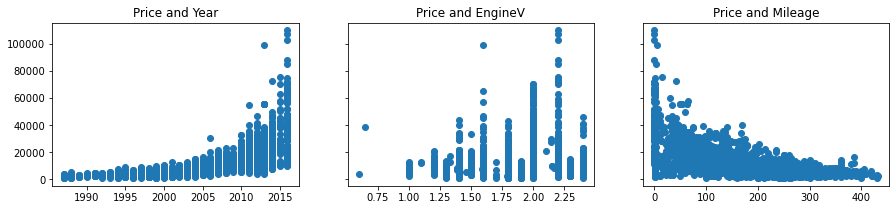

In [22]:
f,(ax1, ax2, ax3) =plt.subplots(1,3,sharey = True, figsize= (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\Yamlak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

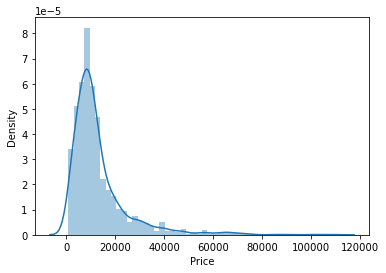

In [23]:
sns.distplot(data_cleaned['Price'])

# tThis is not normmally distributed

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
3,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,7.244228
4,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,9.388487
...,...,...,...,...,...,...,...,...,...
2316,BMW,27900.0,sedan,38,2.0,Petrol,yes,2013,10.236382
2317,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,7.649693
2318,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
2319,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556


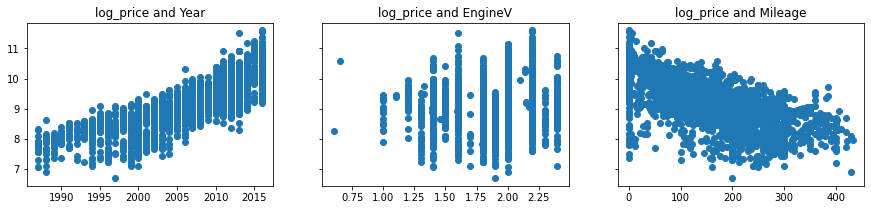

In [25]:
f,(ax1, ax2, ax3) =plt.subplots(1,3,sharey = True, figsize= (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')


plt.show()

In [26]:
data_cleaned = data_cleaned.drop(['Price'], axis =1)

In [27]:
#To check multicollinearity, lets use statsmodel's VIF
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns


In [28]:
vif

,VIF,features
0,4.037310,Mileage
1,38.654233,Year
2,40.481319,EngineV


In [29]:
# vif =1 -> no multi collinearity
# 1<vif<5 ->ok
# vif > 6 -> unacceptable

In [30]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1 )

# Creating Dummies

In [31]:
# for N categories for a feature, we have to create n-1 dummies to avoid multicollinearity

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies


,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,212,1.8,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,177,1.5,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,38,2.0,10.236382,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2317,237,1.9,7.649693,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2318,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
2319,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [34]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [35]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [36]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,7.244228,212,1.8,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,9.388487,177,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
